# Neural Networks with keras and tensorflow

N.B. You will need to pip install keras and tensorflow!

In [1]:
from sklearn.datasets import load_breast_cancer
from matplotlib import pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

For this lesson we'll use sklearn's built-in breast cancer dataset. The next cell loads the data and prints the data description.

In [2]:
data = load_breast_cancer()
print(data.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In [3]:
# Splitting our data and initializing a Scaler

X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, random_state=42)

ss = StandardScaler().fit(X_train)

In [4]:
# Transforming our data

X_train_s = ss.transform(X_train)
X_test_s = ss.transform(X_test)

X_train_s.shape

(426, 30)

In [5]:
X_train_s[:1, :]

array([[-0.34913849, -1.43851335, -0.41172595, -0.39047943, -1.86366229,
        -1.26860704, -0.82617052, -0.95286585, -1.72936805, -0.9415409 ,
        -0.86971355, -1.35865347, -0.83481506, -0.57230673, -0.74586846,
        -0.65398319, -0.52583524, -0.94677147, -0.53781728, -0.63449458,
        -0.54268486, -1.65565452, -0.58986401, -0.52555985, -1.51066925,
        -0.89149994, -0.75021715, -0.91671059, -0.92508585, -0.80841115]])

## Constructing a Neural Network in Keras

In [6]:
# Importing model and layer types

from keras.models import Sequential
from keras.layers import Dense

# Importing our optimizer

from keras.optimizers import Adam

Using TensorFlow backend.


In [7]:
# Constructing and compiling our model

model = Sequential()

inputs = X_train_s.shape[1] # same number of input neurons as input features

hiddens = inputs # same number of hidden neurons as input neurons

model.add(Dense(hiddens, input_dim=inputs, activation='relu'))
model.add(Dense(1))
adam = Adam()

model.compile(optimizer=adam, loss='mean_squared_error')

# Fitting our model

model.fit(X_train_s, y_train, validation_data=(X_test_s, y_test), epochs=100);

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Train on 426 samples, validate on 143 samples
Epoch 1/100
426/426 [==============================] - 0s 417us/step - loss: 1.5779 - val_loss: 1.5135
Epoch 2/100
426/426 [==============================] - 0s 42us/step - loss: 0.8630 - val_loss: 0.9340
Epoch 3/100
426/426 [==============================] - 0s 52us/step - loss: 0.5457 - val_loss: 0.6274
Epoch 4/100
426/426 [==============================] - 0s 51us/step - loss: 0.3950 - val_loss: 0.4651
Epoch 5/100
426/426 [==============================] - 0s 39us/step - loss: 0.3097 - val_loss: 0.3617
Epoch 6/100
426/426 [==============================] - 0s 50us/step - loss: 0.2514 - val_loss: 0.2972
Epoch 7/100
426/426 [==============================] - 0s 41us/step - loss: 0.2115 - val_loss: 0.2486
Epoch 8/100
426/426 [==============================] - 0s 47us/step - loss: 0.1791 - val_loss: 0.2125
Epoch 9/100
426/4

In [8]:
# Storing that fit as a history log

history = model.fit(X_train_s, y_train, validation_data=(X_test_s, y_test), epochs=100)


Train on 426 samples, validate on 143 samples
Epoch 1/100
426/426 [==============================] - 0s 46us/step - loss: 0.0174 - val_loss: 0.0491
Epoch 2/100
426/426 [==============================] - 0s 40us/step - loss: 0.0173 - val_loss: 0.0489
Epoch 3/100
426/426 [==============================] - 0s 43us/step - loss: 0.0171 - val_loss: 0.0492
Epoch 4/100
426/426 [==============================] - 0s 43us/step - loss: 0.0168 - val_loss: 0.0479
Epoch 5/100
426/426 [==============================] - 0s 41us/step - loss: 0.0166 - val_loss: 0.0483
Epoch 6/100
426/426 [==============================] - 0s 43us/step - loss: 0.0172 - val_loss: 0.0483
Epoch 7/100
426/426 [==============================] - 0s 42us/step - loss: 0.0172 - val_loss: 0.0488
Epoch 8/100
426/426 [==============================] - 0s 40us/step - loss: 0.0171 - val_loss: 0.0482
Epoch 9/100
426/426 [==============================] - 0s 40us/step - loss: 0.0167 - val_loss: 0.0478
Epoch 10/100
426/426 [==============

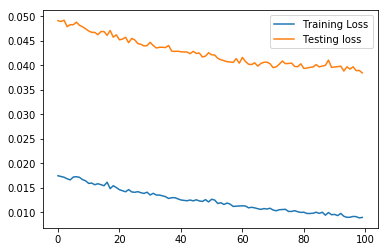

In [9]:
# Plotting our losses

train_loss = history.history['loss']
test_loss = history.history['val_loss']

plt.plot(train_loss, label='Training Loss')
plt.plot(test_loss, label='Testing loss')

plt.legend();

## Tensorflow

In [10]:
import tensorflow as tf

### Tensorflow as a graph constructor

In [17]:
# Constructing the graph

a = tf.Variable(3)
b = tf.Variable(10)

c = a + b
d = a + c * b

In [18]:
# Starting a session

init = tf.global_variables_initializer()

with tf.Session() as session:
    init.run()
    result = session.run(d)

In [19]:
# Printing the output

print(result)

133


### Neural Network

In [22]:
X_train_s.shape

(426, 30)

In [23]:
tf.reset_default_graph()

X = tf.placeholder(dtype=tf.float32, shape=(None, 30))
y = tf.placeholder(dtype=tf.float32, shape=(None, 1))

hid = tf.layers.dense(X, 30, activation=tf.nn.relu)
y_hat = tf.layers.dense(hid, 1, activation=tf.nn.sigmoid)

loss = tf.losses.log_loss(y, y_hat)
optimizer = tf.train.AdamOptimizer(0.01)
training_run = optimizer.minimize(loss)

saver = tf.train.Saver()

In [26]:
init = tf.global_variables_initializer()

with tf.Session() as sess:
    init.run()
    
    for _ in range(100):
        sess.run(training_run, feed_dict={X: X_train_s, y: y_train.reshape(-1, 1)})
        
    pred = sess.run(y_hat, feed_dict={X: X_test_s})

classes = (pred > 0.5).astype(int)

metrics.accuracy_score(y_test.reshape(-1, 1), classes)

0.9790209790209791